# Data

In [ ]:
import pandas as pd

# df_path = './Duplicate_Question_stats.csv'
df_path = '/Volumes/DataDrive/stats/stackexchange_english_devel.xml--stackexchange_english_devel.xml--it50-mc5-s100.mdl.csv'
df = pd.read_csv(df_path)
df.head(n=5)

# Plots

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def create_plot(file_path):
    # Read file from CSV stats file
    df = pd.read_csv(file_path)
    
    # Load data for different 
    irrelevant = df[df.relevance == 'Irrelevant']
    related = df[df.relevance == 'Related']
    perfect_match = df[df.relevance == 'PerfectMatch']
    assert(irrelevant.shape[0] + related.shape[0] + perfect_match.shape[0] == df.shape[0])
    
    labels = ["Irrelevant", "Related", "Perfect Match"]
    parameters = ["score", "no_of_answers", "best_answer_upvotes"]

    fig, ax_list = plt.subplots(len(parameters), figsize=(16, 40))

    for i, param in enumerate(parameters):
        plot_data = [irrelevant[param], related[param], perfect_match[param]]
        ax_list[i].set_title(param)
        ax_list[i].boxplot(plot_data)
        ax_list[i].set_xticklabels(labels)

    plt.show()

# Dataset

In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('/Volumes/DataDrive/merged/en-test-extended.csv')

In [17]:
perfect_match = df[df.relevance == 'PerfectMatch']
rest = df[df.relevance != 'PerfectMatch']

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
perfect_match.shape

(2550, 18)

In [20]:
rest.shape

(10048, 18)

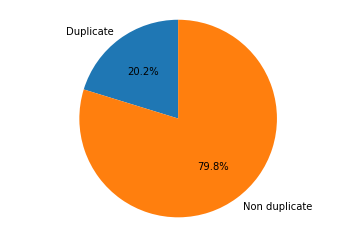

In [21]:
labels = ('Duplicate', 'Non duplicate')
sizes = [len(perfect_match), len(rest)]

fix, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.savefig('/Users/tomek/Desktop/data-distribution-test.png')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x111c6e4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x111c6eeb8>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x111c95748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x111c6e5f8>,
  <matplotlib.lines.Line2D at 0x111cb8400>]}

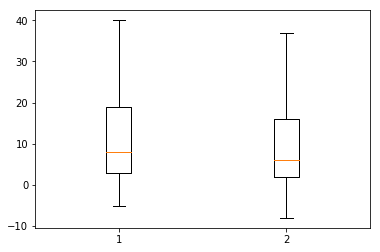

In [22]:
plt.boxplot([rest.score.values, perfect_match.score.values], showfliers=False)